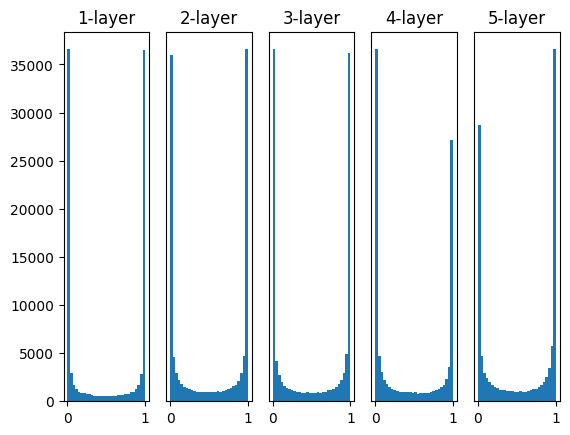

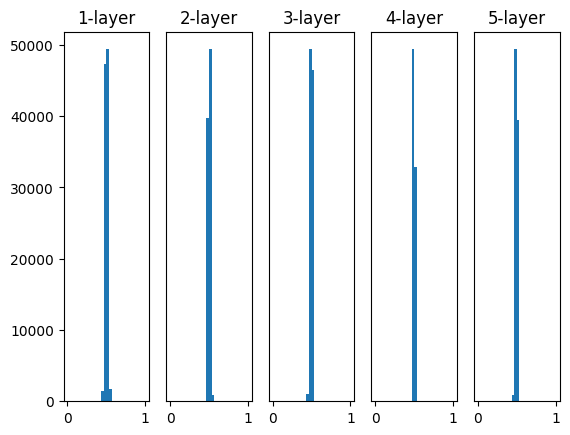

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개 데이터
node_num = 100  # 각 은닉층의 노드 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 활성화 결과 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1  # 표준편차가 1인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    if i != 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01  # 표준편차가 1인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    if i != 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# Xavier 초깃값

- 활성화 함수로 sigmoid 사용시

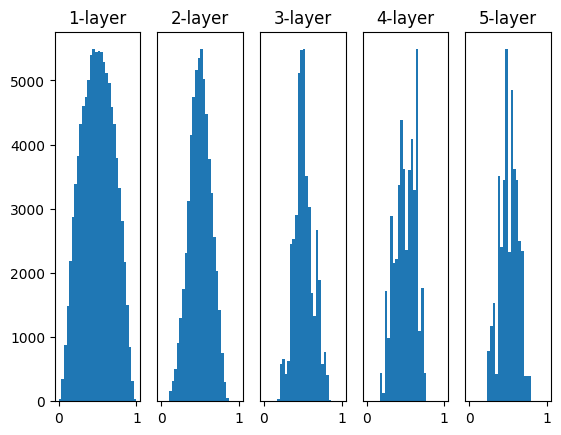

In [9]:
x = np.random.randn(1000, 100)  # 1000개 데이터
node_num = 100  # 각 은닉층의 노드 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 활성화 결과 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 /node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    if i != 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# He 초깃값
- 활성화 함수로 ReLU 사용 시

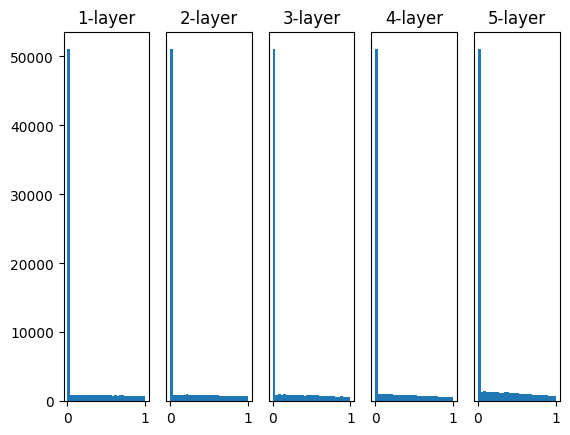

In [11]:
from data.functions import *
input_data = np.random.randn(1000, 100)  # 1000개 데이터
node_num = 100  # 각 은닉층의 노드 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 활성화 결과 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    if i != 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# Overfitting

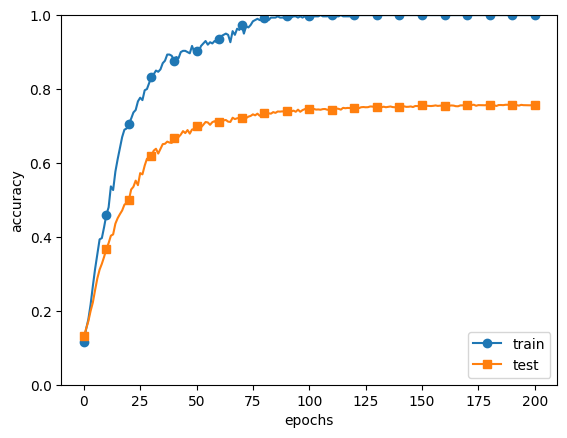

In [15]:
from data.mnist import load_mnist
from data.multi_layer_net import * 
from data.optimizer import SGD

(x_train, t_train), (x_test,  t_test) = load_mnist(normalize=True)

# overfitting재현을 위해 학습 데이터 수 줄임
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size = 784, hidden_size_list=[100,100,100,100,100,100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(10000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Dropout